# Synthetic Discussions analysis

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import re

from tasks.graphs import save_plot

In [ ]:
def get_annotations(annot_str: str) -> dict:
    """Extracts all key-value pairs from the annotation string into a dictionary."""
    try:
        annot_str = str(annot_str).lower()
        # Regex to match key-value pairs of the form type=value
        pattern = r"(\w+)=([-\d\.]+)"
        matches = re.findall(pattern, annot_str)
        return {key: float(value) if '.' in value else int(value) for key, value in matches}
    except Exception as e:
        return {}

def get_user_intent(prompt: str) -> str:
    prompt = prompt.lower()

    if "community" in prompt:
        return "Community-oriented"
    elif "troll" in prompt:
        return "Troll"
    elif "special_instructions: ," in prompt:
        return "Neutral"
    else:
        return "Unknown"


df = pd.read_csv("../data/dataset.csv", encoding="utf8")
df = df.astype(str)

# Extract all annotations from the 'annotation' column
annotations = df['annotation'].apply(get_annotations)

# Convert each annotation dictionary into separate columns
annotations_df = pd.json_normalize(annotations)

# Concatenate the new columns with the original dataframe
df = pd.concat([df, annotations_df], axis=1)

# Process other columns as needed
df.is_moderator = (df.is_moderator == "True").astype(bool)
df["intent"] = df.user_prompt.apply(get_user_intent).astype(str)
df.intent = np.where(df.is_moderator, "Moderator", df.intent).astype(str)

df = df.loc[:, ["conv_id", "conv_variant", "user", "user_prompt", "is_moderator", "intent", "message"] + list(annotations_df.columns)]
df


,conv_id,conv_variant,user,user_prompt,is_moderator,intent,message,toxicity,argumentquality
0,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
1,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
2,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
3,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
4,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
...,...,...,...,...,...,...,...,...,...
15153,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5
15154,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5
15155,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5
15156,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5


In [3]:
df.intent.unique()

array(['Community-oriented', 'Troll', 'Moderator', 'Neutral'],
      dtype=object)

In [4]:
df.loc[df.message.apply(lambda x: len(x.strip()) < 3)]

,conv_id,conv_variant,user,user_prompt,is_moderator,intent,message,toxicity,argumentquality
13816,866e2f2f-2906-42ba-911e-1d6478c648a4,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
13817,866e2f2f-2906-42ba-911e-1d6478c648a4,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
13818,866e2f2f-2906-42ba-911e-1d6478c648a4,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
13819,866e2f2f-2906-42ba-911e-1d6478c648a4,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
13820,866e2f2f-2906-42ba-911e-1d6478c648a4,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
...,...,...,...,...,...,...,...,...,...
15109,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
15110,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
15111,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5
15112,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,.,1,5


In [5]:
df = df[(df.toxicity != -1) | (df.argumentquality != -1)]
df = df[~df.message.apply(lambda x: len(x.strip()) < 3)]
df

,conv_id,conv_variant,user,user_prompt,is_moderator,intent,message,toxicity,argumentquality
0,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
1,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
2,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
3,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
4,e470e71c-6473-407f-bd14-12c66828b5d5,collective_constitution,StoicCarpenter56,You are a human participating in an online cha...,False,Community-oriented,All men are sex offenders? Really? A sexual pr...,4,2
...,...,...,...,...,...,...,...,...,...
15153,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5
15154,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5
15155,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5
15156,ce54c6c9-6b00-4cf4-96e3-48e4b90585f7,vanilla,moderator,You are a human participating in an online cha...,True,Moderator,"@LostInThought52, thank you for your thoughtfu...",1,5


## Analysis

In [6]:
GRAPH_OUTPUT_DIR = Path("../graphs")
TOXICITY_TICKS = np.arange(1, 6, 1)

sns.set(style="whitegrid")

### User intent impact on toxicity

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/intent_barplot.png


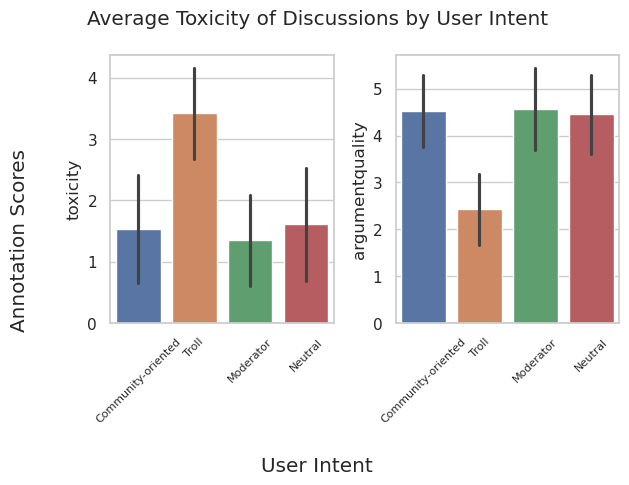

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [7]:
METRICS = ["toxicity", "argumentquality"]

fig, axes = plt.subplots(1, len(METRICS))
for ax, metric in zip(axes, METRICS):
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x="intent",
        hue="intent",
        y=metric,
        errorbar="sd",
        legend=False,
        ax=ax
    )
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.set_xlabel("")


fig.suptitle("Average Toxicity of Discussions by User Intent")
fig.supxlabel("User Intent")
fig.supylabel("Annotation Scores")
fig.tight_layout()

save_plot(path=GRAPH_OUTPUT_DIR / "intent_barplot.png")
plt.show()

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/conv_variant_barplot.png


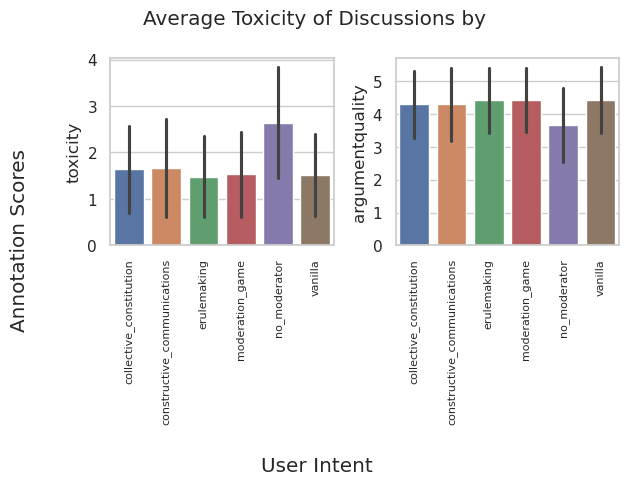

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [8]:
fig, axes = plt.subplots(1, len(METRICS))
for ax, metric in zip(axes, METRICS):
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x="conv_variant",
        hue="conv_variant",
        y=metric,
        errorbar="sd",
        legend=False,
        ax=ax
    )
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)
    ax.set_xlabel("")


fig.suptitle("Average Toxicity of Discussions by ")
fig.supxlabel("User Intent")
fig.supylabel("Annotation Scores")
fig.tight_layout()

save_plot(path=GRAPH_OUTPUT_DIR / "conv_variant_barplot.png")
plt.show()

### Progression of toxicity

In [9]:
timeseries_df = df.reset_index()
timeseries_df = timeseries_df.drop_duplicates(subset=["conv_id", "user", "message"])

# remove moderator
timeseries_df = timeseries_df[~(timeseries_df.user == "moderator")]

timeseries_df["message_order"] = timeseries_df.groupby("conv_id").cumcount()
timeseries_df.message_order = timeseries_df.message_order + 1  # start from 1

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/individual_toxicity_discussions.png


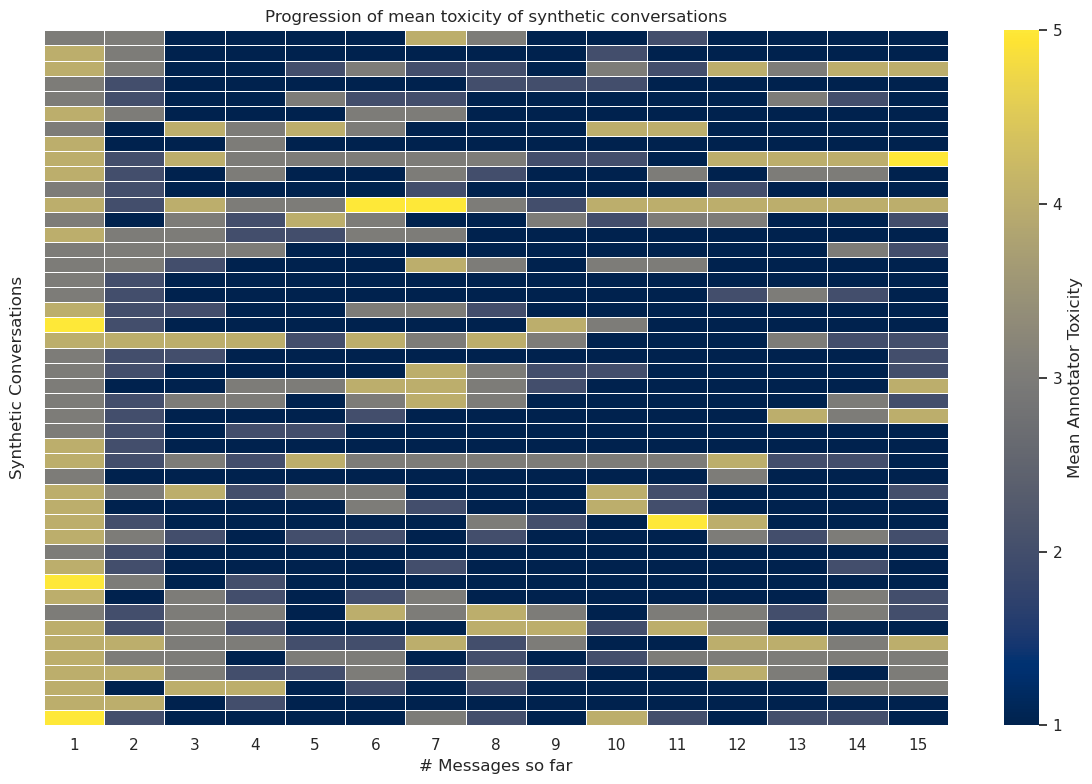

In [10]:
# Calculate the mean toxicity for each message order and conversation
mean_toxicity = (
    timeseries_df.groupby(["conv_id", "message_order"])["toxicity"].mean().reset_index()
)

# Pivot the data to create a matrix where rows are conv_id, columns are message_order
heatmap_data = timeseries_df.pivot(
    index="conv_id", columns="message_order", values="toxicity"
)

# Create the heatmap plot
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    data=heatmap_data,
    cmap="cividis",
    cbar_kws={"label": "Mean Annotator Toxicity", "ticks": TOXICITY_TICKS},
    linewidths=0.5,
)
ax.set(yticklabels=[])
ax.grid(False)

plt.title("Progression of mean toxicity of synthetic conversations")
plt.xlabel("# Messages so far")
plt.ylabel("Synthetic Conversations")
plt.tight_layout()

save_plot(path=GRAPH_OUTPUT_DIR / "individual_toxicity_discussions.png")
plt.show()

### Moderator impact

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/intent_toxicity_timeseries.png


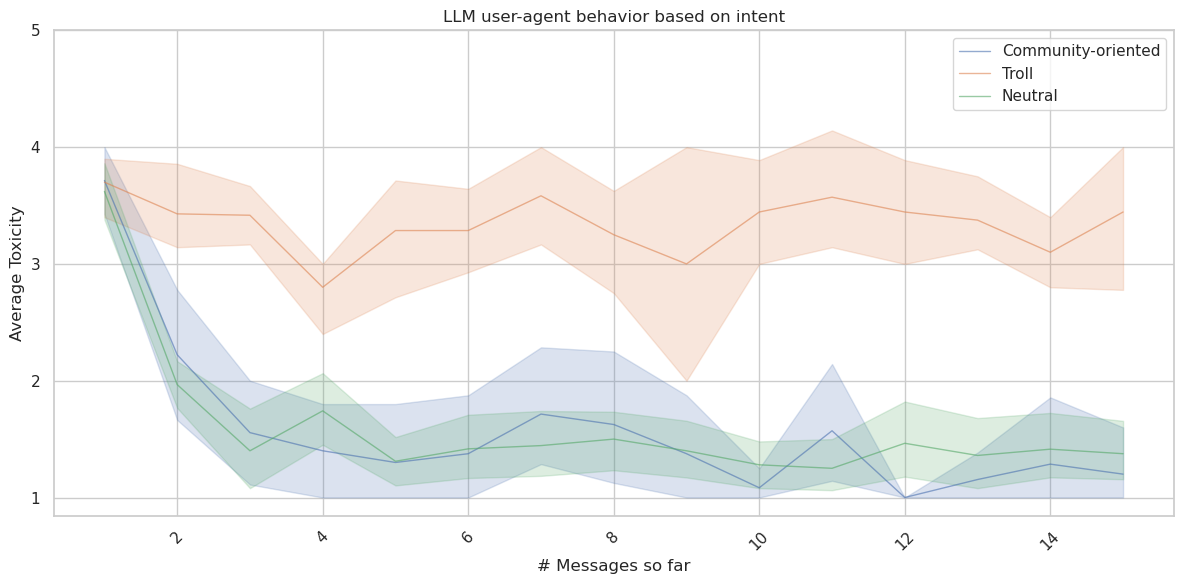

In [11]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=timeseries_df,
    x="message_order",
    y="toxicity",
    hue="intent",
    lw=1,
    alpha=0.6,
)

plt.title("LLM user-agent behavior based on intent")
plt.xlabel("# Messages so far")
plt.ylabel("Average Toxicity")
plt.xticks(rotation=45)
plt.yticks(TOXICITY_TICKS)
plt.legend()
plt.tight_layout()

save_plot(path=GRAPH_OUTPUT_DIR / "intent_toxicity_timeseries.png")
plt.show()

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/strategy_toxicity_timeseries.png


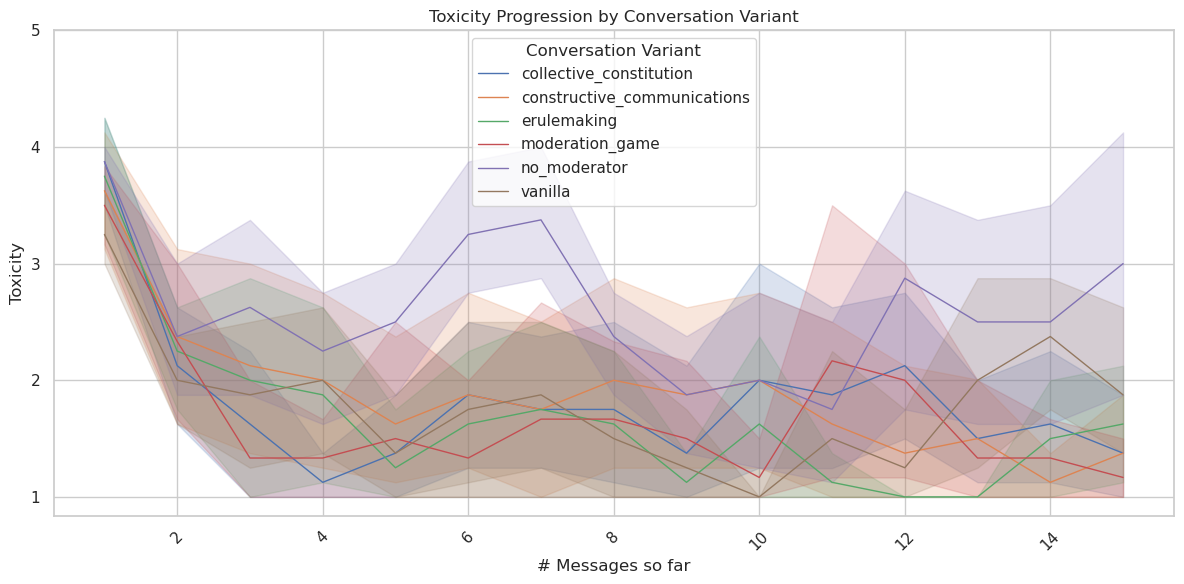

In [12]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=timeseries_df,
    x="message_order", 
    y="toxicity", 
    hue="conv_variant",  # Different lines for each variant
    lw=1, 
    alpha=1,
    #errorbar=None
)

plt.title("Toxicity Progression by Conversation Variant")
plt.xlabel("# Messages so far")
plt.ylabel("Toxicity")
plt.xticks(rotation=45)
plt.yticks(TOXICITY_TICKS)
plt.legend(title="Conversation Variant")
plt.tight_layout()

save_plot(path=GRAPH_OUTPUT_DIR / "strategy_toxicity_timeseries.png")
plt.show()

## Moderator Interventions

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/intervention_count.png


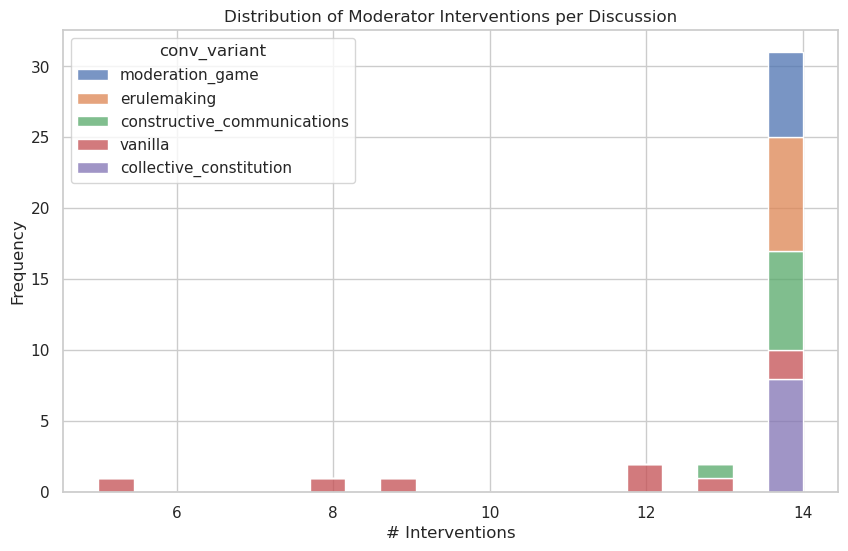

In [13]:
df_unique = df[df["conv_variant"] != "no_moderator"].drop_duplicates(subset=["conv_id", "message"])

# Compute number of moderator interventions per conversation
moderator_interventions = df_unique[df_unique["is_moderator"]].groupby("conv_id").size()

# Merge with conversation variants
conv_variants = df_unique[["conv_id", "conv_variant"]].drop_duplicates().set_index("conv_id")
moderator_interventions = moderator_interventions.to_frame(name="moderator_interventions").join(conv_variants, how="left")

plt.figure(figsize=(10, 6))
sns.histplot(data=moderator_interventions, x="moderator_interventions", hue="conv_variant", multiple="stack", bins=20)
plt.xlabel("# Interventions")
plt.ylabel("Frequency")
plt.title("Distribution of Moderator Interventions per Discussion")

save_plot(path=GRAPH_OUTPUT_DIR / "intervention_count.png")
plt.show()